Import libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots

import os
print(os.listdir("../input"))

['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']


In [2]:
data = pd.read_csv('../input/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.columns = data.columns.str.replace(' ', '_')

In [4]:
print("Shape of data (samples, features): ",data.shape)
print("Data Types: \n", data.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [5]:
data.Size.value_counts().head()
#please remove head() to get a better understanding 

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

In [6]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [7]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [8]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [9]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

In [10]:
data.Size=pd.to_numeric(data.Size)

Text(0,0.5,'Frequency')

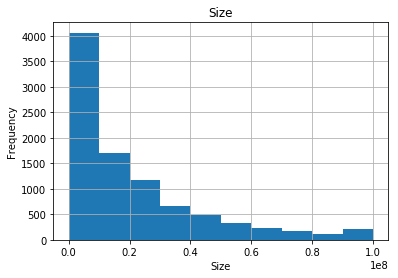

In [11]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

Install data

In [12]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

It can be seen that there are 22 unique values, out of which
- 1 is 0, 
- 1 is Free(string) , which we will be converting to nan here
- and rest are numeric but with '+' and ',' which shall be removed to convert these into numeric type. 

In [13]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

Checking if data is converted to numeric

In [14]:
data.Installs.str.isnumeric().sum()

10840

In [16]:
data.Installs=pd.to_numeric(data.Installs)

Text(0,0.5,'Frequency')

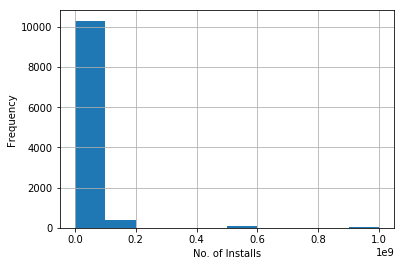

In [17]:
data.Installs=pd.to_numeric(data.Installs)
data.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

Checking if all values in number of Reviews numeric

In [18]:
data.Reviews.str.isnumeric().sum()

10840

In [20]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We could have converted it into interger like we did for <a id='id'>Size</a> but the data for this App looks different. It can be noticed that the entries are entered wrong (i.e. cell backwared). We could fix it by setting **Category** as nan and shifting all the values, but deleting the sample for now. 

In [21]:
data=data.drop(data.index[10472])

In [22]:
data[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000.0,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [23]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

Text(0,0.5,'Frequency')

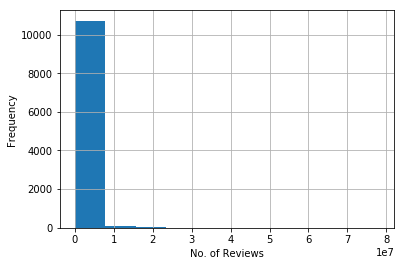

In [24]:
data.Reviews=pd.to_numeric(data.Reviews)
data.Reviews.hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

In [27]:
data.Rating.dtype

dtype('float64')

Data is already numeric, now checking if the data has null values

In [28]:
print(data.Rating.isna().sum(),"null values out of", len(data.Rating))

1474 null values out of 10840


Text(0,0.5,'Frequency')

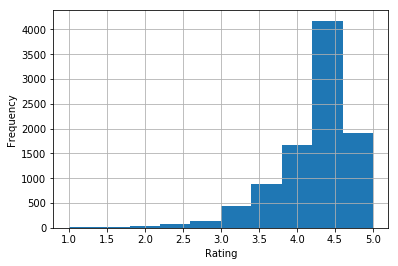

In [29]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [30]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Most of the values have a upper value and a lower value (i.e. a range), lets divide them as two new features **Version begin and end**, which might come handy while processing data furthur.

In [31]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [32]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

In [33]:
twowaytable = pd.crosstab(index=data.Version_begin,columns=data.Version_end)
twowaytable.head()

Version_end,6.0,7.1.1,8.0,Varies with device,nan,up
Version_begin,,,,,,
1.0,0,0,0,0,0,2
1.5,0,0,0,0,0,20
1.6,0,0,0,0,0,116
2.0,0,0,0,0,0,32
2.0.1,0,0,0,0,0,7


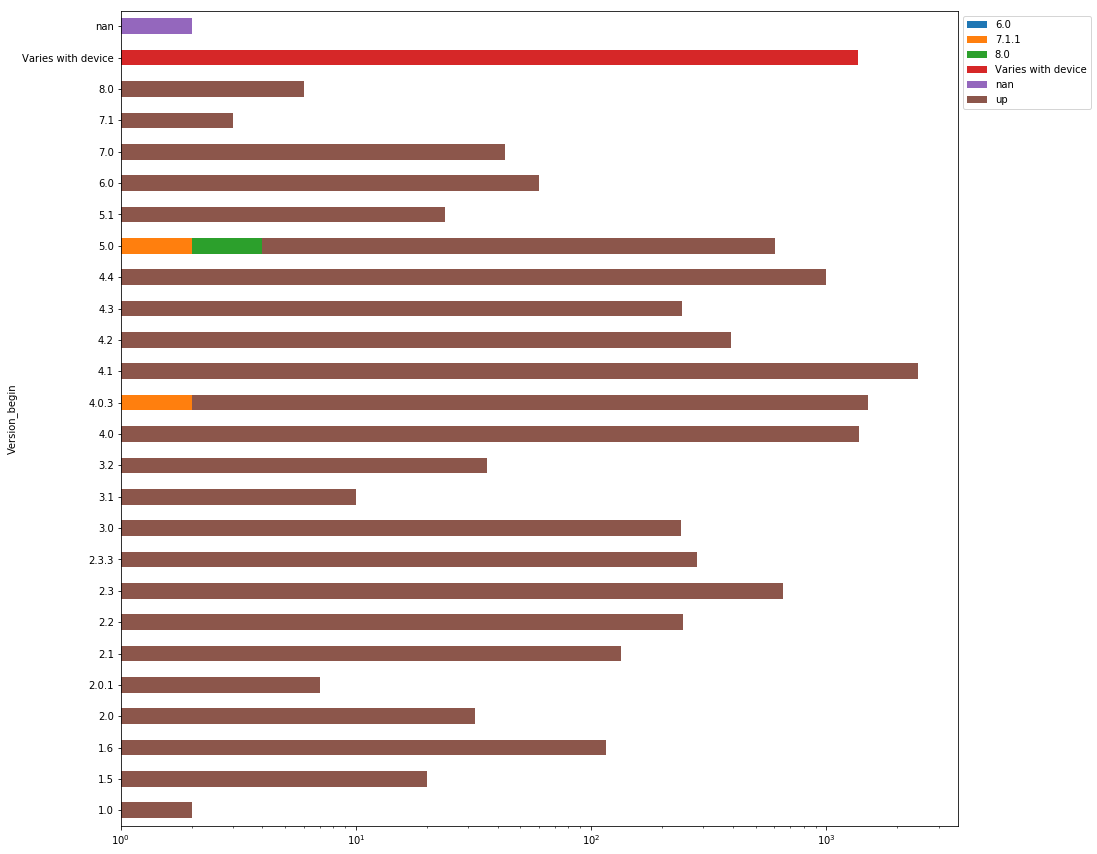

In [34]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [35]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)